## General start
Importing the necessary libraries and packages


In [1]:
!pip install pandas
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np



At this point we have our data as cvs (comma separated values). If you have a look at the 
file, it is just values and words. We use some "pandas" library to make sense of this values.
This turns our cvs file into a table that is readible. 


### Train set

In [3]:
# importing the data
# visualization to have an overall idea

df_train = pd.read_csv('train-Copy1.csv') # now our table is called df_train
df_train.head()
# shows the first 5 entries of our table. NB: counti ng starts 0, not with 1 on python

/var/folders/yg/xmn_7fzd29x_t6vxtfn8_gsw0000gn/T/ipykernel_82717/3887744924.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train-Copy1.csv') # now our table is called df_train


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [4]:
df_train['StateHoliday'] = df_train['StateHoliday'].replace("0", 0)

mapping = {'a': 1, 'b': 1, 'c': 1, 0: 0}

df_train['StateHoliday'] = df_train['StateHoliday'].map(mapping)

print(df_train)



         Store  DayOfWeek        Date  Sales  Customers  Open  Promo   
0            1          5  31/07/2015   5263        555     1      1  \
1            2          5  31/07/2015   6064        625     1      1   
2            3          5  31/07/2015   8314        821     1      1   
3            4          5  31/07/2015  13995       1498     1      1   
4            5          5  31/07/2015   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  01/01/2013      0          0     0      0   
1017205   1112          2  01/01/2013      0          0     0      0   
1017206   1113          2  01/01/2013      0          0     0      0   
1017207   1114          2  01/01/2013      0          0     0      0   
1017208   1115          2  01/01/2013      0          0     0      0   

         StateHoliday  SchoolHoliday  
0                   0              1  
1                   0              1  
2                 

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  int64 
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 69.8+ MB


In [6]:
# duplicates
# I want to see if the data is clean, so I am checking if there are any duplicate rows. 
# I used the code provided by chatgpt


# Find duplicate rows based on specific columns
duplicate_rows_mask = df_train.duplicated( keep=False)

# Filter the DataFrame to select only the duplicate rows
duplicate_rows = df_train[duplicate_rows_mask]

# Print or examine a sample of the duplicate rows
print("Sample of duplicate rows:")
print(duplicate_rows.head(10))  # Adjust the number to display as needed

# no duplicates in train

Sample of duplicate rows:
Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []


In [7]:
df_train.info()
# .info() is a method. it gives us the details of df
# it also shows us the titles of the columns, how many entries per column and the data type of the column (integer, string etc)
# object dtype refers to a column with mixed data types
# in order to perform analysis on our data, datatypes in columns should be homogeneous. we cant work with mixed types
# we have to examine further to see how to handle this problem, there isnt really one fits all solution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  int64 
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 69.8+ MB


In [8]:
list(df_train.columns)
#shows us the names of the columns. It is already given on the documentation but still useful to have this

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [9]:
# Lets examine one of these "object" columns
df_train["Date"]
#dates are entered in an arbitrary way. This is not cool. Thankfully it is v. easy to address this problem

0          31/07/2015
1          31/07/2015
2          31/07/2015
3          31/07/2015
4          31/07/2015
              ...    
1017204    01/01/2013
1017205    01/01/2013
1017206    01/01/2013
1017207    01/01/2013
1017208    01/01/2013
Name: Date, Length: 1017209, dtype: object

In [10]:
# pandas library gives us an option to turn this directly into dates
df_train['Date'] = pd.to_datetime(df_train['Date'], format='%d/%m/%Y')

In [11]:
#checking again to see if the transformation went well
df_train["Date"].info()
# voila, now our date column is in datetime64[ns]
# We still canno perform analysis on this datatype but we can easily turn it into several columns of year and months. We already have the days column in the set

<class 'pandas.core.series.Series'>
RangeIndex: 1017209 entries, 0 to 1017208
Series name: Date
Non-Null Count    Dtype         
--------------    -----         
1017209 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 MB


## Encoding
(turning categorical/object columns into numeric so that we can have further analysis on them)

The following two methods i started and then abandoned. I am keeping them here just for the reference. Also because I like them.

Nb: The following code refers to df_train as df instead

Eventually since we only have 4 categories ill do it manually lollll
do not try this at home, or especially in a professional environment, with larger sets of data :D

In [12]:
# dropping the columns where store is closed ( sales= 0)

#df = df.drop(df[df['quantity'] == 0].index)
#df_train = df_train.drop(df_train[df_train['Open'] == 0].index)

In [14]:
# we have one row showing date. we are extracting it to different columns to analyse further

# Extract date components
df_train['Month'] = df_train['Date'].dt.month
df_train['Year'] = df_train['Date'].dt.year

In [15]:
# open column, i am hesitant to drop as we will have it in the test set. maybe later find a way to implemet if 
# open=0 then sales should be marked 0 as well 

#df_train = df_train.drop(columns=['Open'])

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
 9   Month          1017209 non-null  int32         
 10  Year           1017209 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(8)
memory usage: 77.6 MB


## Test set
We have to do the same transformations we did to the train set because they have to be comperable later on when we create our model and want to test it.


In [17]:
df_test = pd.read_csv('test-Copy1.csv') # now our table is called df_test
df_test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


In [18]:
df_train['StateHoliday'] = df_train['StateHoliday'].replace("0", 0)

mapping_t = {'a': 1, "0": 0}

df_test['StateHoliday'] = df_test['StateHoliday'].map(mapping_t)

In [19]:
# null value check 
null_counts_test = df_test.isnull().sum()

# Filter columns with null values
columns_with_null_test = null_counts_test[null_counts_test > 0]

# Print the count of null values in each column
print("Count of null values in each column:")
print(columns_with_null_test)

# Get the whereabouts of null values
null_locations_test = df_test[df_test.isnull().any(axis=1)]

# Print the whereabouts of null values
print("\nWhereabouts of null values:")
print(null_locations_test)

# as written on documentation, sales and customers are missing we will figure it out later.
#? is customer even relevant?
# there is also 11 values in open. its a very s. minority, we can decide how to deal with it


Count of null values in each column:
Sales        41088
Customers    41088
Open            11
dtype: int64

Whereabouts of null values:
       Store  DayOfWeek        Date  Sales  Customers  Open  Promo   
0          1          4  17/09/2015    NaN        NaN   1.0      1  \
1          3          4  17/09/2015    NaN        NaN   1.0      1   
2          7          4  17/09/2015    NaN        NaN   1.0      1   
3          8          4  17/09/2015    NaN        NaN   1.0      1   
4          9          4  17/09/2015    NaN        NaN   1.0      1   
...      ...        ...         ...    ...        ...   ...    ...   
41083   1111          6  01/08/2015    NaN        NaN   1.0      0   
41084   1112          6  01/08/2015    NaN        NaN   1.0      0   
41085   1113          6  01/08/2015    NaN        NaN   1.0      0   
41086   1114          6  01/08/2015    NaN        NaN   1.0      0   
41087   1115          6  01/08/2015    NaN        NaN   1.0      0   

       StateHoliday  Sc

In [20]:
# duplicates


# Find duplicate rows based on specific columns
duplicate_rows_mask_test = df_test.duplicated( keep=False)

# Filter the DataFrame to select only the duplicate rows
duplicate_rows_test = df_test[duplicate_rows_mask_test]

# Print or examine a sample of the duplicate rows
print("Sample of duplicate rows:")
print(duplicate_rows_test.head(10))  # Adjust the number to display as needed

# no duplicates in test

Sample of duplicate rows:
Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []


In [21]:
df_test.info()
# to see the dset. Identical columns with the same initial datasets to the train file.
#except, it is missing our target variable (sales) which we will create the model to predict but apparently we cannot, because we were supposed 
#to use the test set to check accuracy, but looks like we cannot loll
# i will still pre process the set to match train and then we will see whats what
# possible solutions include asking the instructer wtf is that or
#to disregard the test set completely and  doing a manual train/test split from the train set we already have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  int64  
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.8+ MB


In [22]:
# changing the format of the date
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%d/%m/%Y')

In [24]:
# we have one row showing date. we are extracting it to different columns to analyse further

# Extract date components
df_test['Month'] = df_test['Date'].dt.month
df_test['Year'] = df_test['Date'].dt.year

## Store file

In [25]:
df_store = pd.read_csv('store-Copy1.csv') # now our table is called df_store
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [26]:
# duplicates


# Find duplicate rows based on specific columns
duplicate_rows_mask_store = df_store.duplicated( keep=False)

# Filter the DataFrame to select only the duplicate rows
duplicate_rows_store = df_store[duplicate_rows_mask_store]

# Print or examine a sample of the duplicate rows
print("Sample of duplicate rows:")
print(duplicate_rows_store.head(10))  # Adjust the number to display as needed

# no duplicates in store

Sample of duplicate rows:
Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []


In [27]:
# null value 
null_counts_store = df_store.isnull().sum()

# Filter columns with null values
columns_with_null_store = null_counts_store[null_counts_store > 0]

# Print the count of null values in each column
print("Count of null values in each column:")
print(columns_with_null_store)

# Get the whereabouts of null values
null_locations_store = df_store[df_store.isnull().any(axis=1)]

# Print the whereabouts of null values
print("\nWhereabouts of null values:")
print(null_locations_store)

# given there are 1115 columns, nulls of 354/544 are high. first analyse the relevance, then if needed to keep, find the adequate method


Count of null values in each column:
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Whereabouts of null values:
      Store StoreType Assortment  CompetitionDistance   
0         1         c          a               1270.0  \
3         4         c          c                620.0   
4         5         a          a              29910.0   
5         6         a          a                310.0   
6         7         a          c              24000.0   
...     ...       ...        ...                  ...   
1109   1110         c          c                900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  Compe

In [28]:
# yeah if we wanna work with it we again need to fix tthe object dtypes --> storetype(a,b,c,d again, we will do the same as the stateholiday)
# assortment(a.b.c: the same) ; promointerval (the consecutive intervals in which Promo2 is re- started, naming the months the 
#promotion is started anew. e.g., "Feb,May,Aug,Nov" means each round of the coupon based mailing campaign starts in February, May, August,
#November of any given year for that store, as the coupons, mostly for a 
#discount on certain products are usually valid for three months, and a new round of mail needs to be sent to customers just before those coupons have expired)
# not sure if i understand the last variable

In [29]:
# looking deeper into promo interval

df_store["PromoInterval"].unique()

# map it to 3

df_store['PromoInterval'].isnull().sum()
# 544/1115 is missing 

544

In [30]:
# looking deeper into assortment

df_store["Assortment"].unique()

# a (1) = basic, b (2) = extra, c (3) = extended

#df_store['Assortment'].isnull().sum()
# no missing

array(['a', 'c', 'b'], dtype=object)

In [31]:
# looking deeper into StoreType

df_store["StoreType"].unique()

# a, b ,c, d: map it to 4

df_store['StoreType'].isnull().sum()
# no missing

0

## Encoding

In [32]:
# encoding for store 

# One-hot encoding for StoreType in the stores dataframe
df_store = pd.get_dummies(df_store, columns=['StoreType'], prefix='StoreType')
#encoding also store assortment
df_store = pd.get_dummies(df_store, columns=['Assortment'], prefix='Assortment')

# One-hot encoding for DayOfWeek in the train dataframe
df_train = pd.get_dummies(df_train, columns=['DayOfWeek'], prefix='DayOfWeek')
df_test = pd.get_dummies(df_test, columns=['DayOfWeek'], prefix='DayOfWeek')



In [33]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   CompetitionDistance        1112 non-null   float64
 2   CompetitionOpenSinceMonth  761 non-null    float64
 3   CompetitionOpenSinceYear   761 non-null    float64
 4   Promo2                     1115 non-null   int64  
 5   Promo2SinceWeek            571 non-null    float64
 6   Promo2SinceYear            571 non-null    float64
 7   PromoInterval              571 non-null    object 
 8   StoreType_a                1115 non-null   bool   
 9   StoreType_b                1115 non-null   bool   
 10  StoreType_c                1115 non-null   bool   
 11  StoreType_d                1115 non-null   bool   
 12  Assortment_a               1115 non-null   bool   
 13  Assortment_b               1115 non-null   bool 

In [34]:
# df_store.shape
# had 1115 entries, and 544 missing 


In [35]:
# imputing before encoding

In [36]:

# promo related 3 columns are missing for 544 entries that are not participating.
#so we fill it with 0
df_store["Promo2SinceWeek"] = df_store["Promo2SinceWeek"].fillna(0)
df_store["Promo2SinceYear"] = df_store["Promo2SinceYear"].fillna(0)
df_store["PromoInterval"] = df_store["PromoInterval"].fillna(0)


In [37]:
# imputation for distance
!pip install scikit-learn
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [38]:
columns_to_impute = ['CompetitionDistance', 'CompetitionOpenSinceMonth', "CompetitionOpenSinceYear"]
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed_columns = imputer.fit_transform(df_store[columns_to_impute])
df_imputed_columns = pd.DataFrame(df_imputed_columns, columns=columns_to_impute)
df_store[columns_to_impute] = df_imputed_columns

In [39]:
# now no missing values in store set

In [40]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   CompetitionDistance        1115 non-null   float64
 2   CompetitionOpenSinceMonth  1115 non-null   float64
 3   CompetitionOpenSinceYear   1115 non-null   float64
 4   Promo2                     1115 non-null   int64  
 5   Promo2SinceWeek            1115 non-null   float64
 6   Promo2SinceYear            1115 non-null   float64
 7   PromoInterval              1115 non-null   object 
 8   StoreType_a                1115 non-null   bool   
 9   StoreType_b                1115 non-null   bool   
 10  StoreType_c                1115 non-null   bool   
 11  StoreType_d                1115 non-null   bool   
 12  Assortment_a               1115 non-null   bool   
 13  Assortment_b               1115 non-null   bool 

In [41]:


# Function to convert Promo2SinceWeek and Promo2SinceYear to a datetime object
def convert_week_year_to_date(week, year):
    if pd.isna(week) or pd.isna(year) or week == 0 or year == 0:
        return np.nan
    first_day_of_year = datetime.strptime(f'{int(year)}-01-01', '%Y-%m-%d')
    promo_date = first_day_of_year + timedelta(weeks=(int(week)-1))
    return promo_date

# Apply the function to create a new datetime column
df_store['Promo2StartDate'] = df_store.apply(lambda row: convert_week_year_to_date(row['Promo2SinceWeek'], row['Promo2SinceYear']), axis=1)





In [42]:
df_store.isnull().sum()

Store                          0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
StoreType_a                    0
StoreType_b                    0
StoreType_c                    0
StoreType_d                    0
Assortment_a                   0
Assortment_b                   0
Assortment_c                   0
Promo2StartDate              544
dtype: int64

In [43]:
# getting competition open since into date as well to calculate the time in between



#turning the flooats into integers first
df_store['CompetitionOpenSinceMonth'] = df_store['CompetitionOpenSinceMonth'].astype(int)
df_store['CompetitionOpenSinceYear'] = df_store['CompetitionOpenSinceYear'].astype(int)

# Step 1: Create a new column combining 'competition_open_since_year' and 'competition_open_since_month'
# Convert to string and format with leading zeros for month
df_store['competition_open_date'] = df_store['CompetitionOpenSinceYear'].astype(str) + '-' + df_store['CompetitionOpenSinceMonth'].astype(str).str.zfill(2)

# Step 2: Convert the new column to a datetime object
df_store['competition_open_date'] = pd.to_datetime(df_store['competition_open_date'], format='%Y-%m')

print("\nDataFrame after merging and converting to datetime:")
print(df_store.info())





DataFrame after merging and converting to datetime:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      1115 non-null   int64         
 1   CompetitionDistance        1115 non-null   float64       
 2   CompetitionOpenSinceMonth  1115 non-null   int64         
 3   CompetitionOpenSinceYear   1115 non-null   int64         
 4   Promo2                     1115 non-null   int64         
 5   Promo2SinceWeek            1115 non-null   float64       
 6   Promo2SinceYear            1115 non-null   float64       
 7   PromoInterval              1115 non-null   object        
 8   StoreType_a                1115 non-null   bool          
 9   StoreType_b                1115 non-null   bool          
 10  StoreType_c                1115 non-null   bool          
 11  StoreType_d     

In [45]:
# encoding promointerval before continuing 
promo_interval_dummies = df_store['PromoInterval'].str.get_dummies(sep=',')

# Combine the original DataFrame with the new one hot encoded columns
df_store = pd.concat([df_store, promo_interval_dummies], axis=1)

# Optionally drop the original PromoInterval column if no longer needed
df_store.drop('PromoInterval', axis=1, inplace=True)


In [46]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      1115 non-null   int64         
 1   CompetitionDistance        1115 non-null   float64       
 2   CompetitionOpenSinceMonth  1115 non-null   int64         
 3   CompetitionOpenSinceYear   1115 non-null   int64         
 4   Promo2                     1115 non-null   int64         
 5   Promo2SinceWeek            1115 non-null   float64       
 6   Promo2SinceYear            1115 non-null   float64       
 7   StoreType_a                1115 non-null   bool          
 8   StoreType_b                1115 non-null   bool          
 9   StoreType_c                1115 non-null   bool          
 10  StoreType_d                1115 non-null   bool          
 11  Assortment_a               1115 non-null   bool          
 12  Assort

In [47]:
df_store["0"].value_counts()
# 0 is the value for non participant stores

0
0    571
1    544
Name: count, dtype: int64

In [48]:
df_train["Month"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1017209 entries, 0 to 1017208
Series name: Month
Non-Null Count    Dtype
--------------    -----
1017209 non-null  int32
dtypes: int32(1)
memory usage: 3.9 MB


In [49]:
# now we can drop comp open since month and year and also for promo2
df_store = df_store.drop(columns=[ "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"])


In [50]:
# now we can merge
new_train = pd.merge(df_train, df_store, on='Store')
new_test = pd.merge(df_test, df_store, on='Store')

In [51]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 41 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Store                  1017209 non-null  int64         
 1   Date                   1017209 non-null  datetime64[ns]
 2   Sales                  1017209 non-null  int64         
 3   Customers              1017209 non-null  int64         
 4   Open                   1017209 non-null  int64         
 5   Promo                  1017209 non-null  int64         
 6   StateHoliday           1017209 non-null  int64         
 7   SchoolHoliday          1017209 non-null  int64         
 8   Month                  1017209 non-null  int32         
 9   Year                   1017209 non-null  int32         
 10  DayOfWeek_1            1017209 non-null  bool          
 11  DayOfWeek_2            1017209 non-null  bool          
 12  DayOfWeek_3            10172

In [52]:
# Calculate the difference in days
new_train['CompetitionOpenSinceDays'] = (new_train['Date'] - new_train['competition_open_date']).dt.days
new_train['Promo2SinceDays'] = (new_train['Date'] - new_train['Promo2StartDate']).dt.days

new_test['CompetitionOpenSinceDays'] = (new_test['Date'] - new_test['competition_open_date']).dt.days
new_test['Promo2SinceDays'] = (new_test['Date'] - new_test['Promo2StartDate']).dt.days

# Replace NaN values with 0
new_train['CompetitionOpenSinceDays'].fillna(0, inplace=True)
new_train['Promo2SinceDays'].fillna(0, inplace=True)

new_test['CompetitionOpenSinceDays'].fillna(0, inplace=True)
new_test['Promo2SinceDays'].fillna(0, inplace=True)

print(new_train)
print(new_test)

         Store       Date  Sales  Customers  Open  Promo  StateHoliday   
0            1 2015-07-31   5263        555     1      1             0  \
1            1 2015-07-30   5020        546     1      1             0   
2            1 2015-07-29   4782        523     1      1             0   
3            1 2015-07-28   5011        560     1      1             0   
4            1 2015-07-27   6102        612     1      1             0   
...        ...        ...    ...        ...   ...    ...           ...   
1017204   1115 2013-01-05   4771        339     1      0             0   
1017205   1115 2013-01-04   4540        326     1      0             0   
1017206   1115 2013-01-03   4297        300     1      0             0   
1017207   1115 2013-01-02   3697        305     1      0             0   
1017208   1115 2013-01-01      0          0     0      0             1   

         SchoolHoliday  Month  Year  ...  Jan  Jul  Jun  Mar  May  Nov  Oct   
0                    1      7  2

In [53]:
# now we drop now unnecessary columns
new_train = new_train.drop(columns=[ "competition_open_date", "Promo2StartDate"])
new_test = new_test.drop(columns=[ "competition_open_date", "Promo2StartDate"])

In [54]:
new_train["CompetitionDistance"]

0          1270.0
1          1270.0
2          1270.0
3          1270.0
4          1270.0
            ...  
1017204    5350.0
1017205    5350.0
1017206    5350.0
1017207    5350.0
1017208    5350.0
Name: CompetitionDistance, Length: 1017209, dtype: float64

In [55]:
new_train['CompetitionDistance'].max()

75860.0

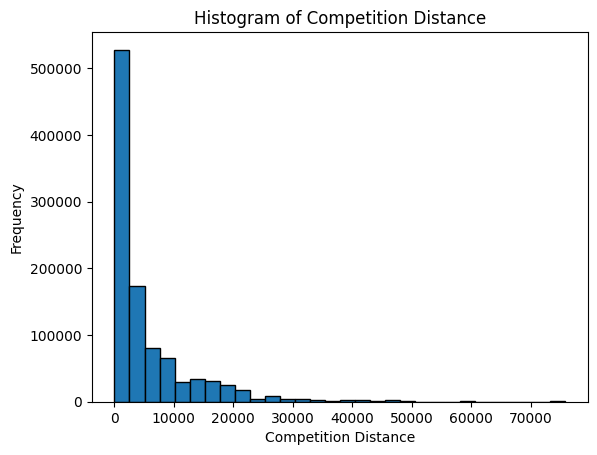

In [56]:
# to see the distribution
import matplotlib.pyplot as plt

# Example: Plotting a histogram for CompetitionDistance
plt.hist(new_train['CompetitionDistance'], bins=30, edgecolor='black')
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Competition Distance')
plt.show()

In [57]:
from scipy.stats import skew
skewness = skew(new_train['CompetitionDistance'])
print("Skewness of Competition Distance:", skewness)
# since our skewness came 2.98, we will use log transform

Skewness of Competition Distance: 2.9323655975915637


In [58]:

# Log transformation
new_train['CompetitionDistance'] = np.log1p(new_train['CompetitionDistance'])
new_test['CompetitionDistance'] = np.log1p(new_test['CompetitionDistance'])
# new skewness -0.3, much better

In [59]:
# last step, creating a new column indicating if promo2 is active on the given month. then we can also drop one hot encode of months

In [60]:
# Define a list of month columns
month_columns = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sept']

# Create a new column 'MonthIndicator' which is 1 if any month column matches the Month value
new_train['Promo2ParticipationCurrently'] = new_train.apply(lambda row: 1 if row[month_columns[row['Month'] - 1]] == 1 else 0, axis=1)
new_test['Promo2ParticipationCurrently'] = new_test.apply(lambda row: 1 if row[month_columns[row['Month'] - 1]] == 1 else 0, axis=1)



In [61]:
# now we have the related info: we can drop unnecessary columns 
# List of columns to drop
columns_to_drop = ['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sept']

# Drop columns from new_train
new_train = new_train.drop(columns=columns_to_drop)

# Drop columns from new_test
new_test = new_test.drop(columns=columns_to_drop)


In [62]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 29 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   Store                         1017209 non-null  int64         
 1   Date                          1017209 non-null  datetime64[ns]
 2   Sales                         1017209 non-null  int64         
 3   Customers                     1017209 non-null  int64         
 4   Open                          1017209 non-null  int64         
 5   Promo                         1017209 non-null  int64         
 6   StateHoliday                  1017209 non-null  int64         
 7   SchoolHoliday                 1017209 non-null  int64         
 8   Month                         1017209 non-null  int32         
 9   Year                          1017209 non-null  int32         
 10  DayOfWeek_1                   1017209 non-null  bool          
 11

In [63]:
# since date column is in a type that we cannot work with, we have to drop it
new_train = new_train.drop(columns=['Date'])
new_test = new_test.drop(columns=['Date'])

In [64]:
# saving the new files
new_train.to_csv('new_train.csv', index=False)
new_test.to_csv('new_test.csv', index=False)

In [65]:
new_train.isnull().sum()

Store                           0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
Month                           0
Year                            0
DayOfWeek_1                     0
DayOfWeek_2                     0
DayOfWeek_3                     0
DayOfWeek_4                     0
DayOfWeek_5                     0
DayOfWeek_6                     0
DayOfWeek_7                     0
CompetitionDistance             0
Promo2                          0
StoreType_a                     0
StoreType_b                     0
StoreType_c                     0
StoreType_d                     0
Assortment_a                    0
Assortment_b                    0
Assortment_c                    0
CompetitionOpenSinceDays        0
Promo2SinceDays                 0
Promo2ParticipationCurrently    0
dtype: int64

## Extra observations, no need to run further


In [66]:
#Relative Proportion of Outliers

# total # of points
total_data_points = new_train.shape[0]


# Calculate relative proportion of outliers
relative_proportion = outliers_count / total_data_points

print("Relative Proportion of Outliers:", relative_proportion)


NameError: name 'outliers_count' is not defined

In [ ]:
import matplotlib.pyplot as plt

# histograms by column. obviously we will choose which ones to go with

# Plot histograms for each column
for column in new_train.columns:
    plt.figure(figsize=(3, 2))
    plt.hist(new_train[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.grid(True)
    plt.show()


In [ ]:
# seeing outliers 

# Create a dictionary to store the count of outliers for each column
outliers_count_by_column = {}

# Iterate over each column to calculate the count of outliers
for column_index, column_name in enumerate(new_train.columns):
    # Get the indices of outliers for the current column
    column_outliers_indices = outliers_z[0][outliers_z[1] == column_index]
    # Count the number of outliers for the current column
    column_outliers_count = len(column_outliers_indices)
    # Store the count of outliers for the current column in the dictionary
    outliers_count_by_column[column_name] = column_outliers_count

# Print the count of outliers for each column
for column, count in outliers_count_by_column.items():
    print(f"Number of outliers in '{column}': {count}")

 # outliers in customers -expected-, sales - defo needs to keep, 
# state holiday (not holiday: 843482 holiday: 910 = shows holidays as outlier),
#competition distance (many arbitrary values, as distance varies) 
#and CompetitionOpenSinceYear' (years are taken as float, maybe calculated day/month included. thus many values. not sure how to handle)

In [ ]:

# Calculate the variance for each column
variance = new_train.var()

# Display the variance
print("Variance of each column:")
print(variance)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlations = new_train.corr()['Sales'].sort_values(ascending=False)

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Correlation with Sales')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()



# Calculate correlations table
correlations_table = new_train.corrwith(new_train['Sales']).sort_values(ascending=False)

# Convert correlations to DataFrame
correlation_df = pd.DataFrame(correlations_table, columns=['Correlation with Sales'])

# Print correlation DataFrame
print("Correlation Coefficients with Sales:")
print(correlation_df)
